In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import seaborn as sns

In [2]:
global mu10,mu20,mu1,mu2,gamma,D,eta,kappa

In [3]:
def TwoSpeciesHGT(t,y):
    s1=y[0]
    s2=y[1]
    p1=y[2]
    p2=y[3]
    lambda1=mu1/mu10-1
    lambda2=mu2/mu20-1
    dydt=[mu1/s1*(s1+lambda2*p1)*s1*(1-s1-gamma*s2)-D*s1,
        mu2/s2*(s2+lambda1*p2)*s2*(1-gamma*s1-s2)-D*s2,
        mu1*(1+lambda2)*p1*(1-s1-gamma*s2)+eta*(s2+p1)*(s1-p1)-kappa*p1-D*p1,
        mu2*(1+lambda1)*p2*(1-gamma*s1-s2)+eta*(s1+p2)*(s2-p2)-kappa*p2-D*p2]
    return dydt

In [4]:
gammas=[1,1.05,1.1,1.2]
etas=np.arange(0,0.5,0.1)
Feasi=np.zeros((len(gammas),len(etas)))
kappa=0.005
D=0.2
mu1s=np.random.rand(100)
mu2s=np.random.rand(len(mu1s))
mu10=0.5
mu20=0.5
num=100
timespan=np.arange(0,500.1,0.1)
thresh=0.02

In [5]:
for fg in range(len(gammas)):
    gamma=gammas[fg]
    print(fg)
    for sd in range(len(etas)):
        eta=etas[sd]
        print(sd)
        S1AbunHGT=np.zeros((len(mu1s),num))
        S2AbunHGT=np.zeros((len(mu1s),num))
        for i in range(len(mu1s)):
            mu1=mu1s[i]
            mu2=mu2s[i]
            for k in range(num):
                temp1=np.random.rand()
                temp2=np.random.rand()
                initialHGT=[temp1,temp2,temp1*np.random.rand()**2,temp2*np.random.rand()**2]
                sol=solve_ivp(TwoSpeciesHGT,[0,max(timespan)],initialHGT,method='RK45',t_eval=timespan)
                y2=np.transpose(sol.y)
                S1AbunHGT[i,k]=y2[-1,0]
                S2AbunHGT[i,k]=y2[-1,1]
        XX=S1AbunHGT
        YY=S2AbunHGT
        for i in range(len(mu1s)):
            if max(XX[i,:])-min(XX[i,:])>thresh and max(YY[i,:])-min(YY[i,:])>thresh:
                Feasi[fg,sd]=Feasi[fg,sd]+1

0
0
1
2
3
4
1
0
1
2
3
4
2
0
1
2
3
4
3
0
1
2
3
4


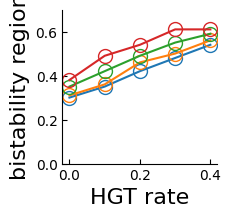

In [6]:
plt.figure(figsize=(2,2))
for i in range(len(gammas)):
    plt.plot(etas,Feasi[i,:]/len(mu1s),'o-',markersize=10,fillstyle='none')
plt.xlabel('HGT rate',fontsize=16)
plt.ylabel('bistability region',fontsize=16)
#plt.xlim([0,max(etas)])
plt.ylim([0,0.7])
ax=plt.gca()
ax.spines[['top', 'right']].set_visible(False)
plt.tick_params(direction='in')
plt.savefig('Changing Competition.pdf')
plt.savefig('Changing Competition.jpg',dpi=1000)
plt.show()

import pandas as pd
df=pd.DataFrame(Feasi)
df.to_csv("Changing Competition.csv")